In [1]:
# !pip install wordcloud  워드클라우드 설치

In [22]:
from wordcloud import WordCloud

In [16]:
# 한글 문장 리스트

comments = [
    "이 영화 정말 좋아요!",
    "배우들의 연기가 너무 인상적이었어요.",
    "스토리가 너무 감동적이에요.",
    "이 영화는 꼭 보세요!",
    "음악이 영화 분위기를 더 좋게 만들어줬어요.",
    "영상미가 아름답습니다.",
    "이런 영화가 더 많이 나왔으면 좋겠어요.",
    "장면 전환과 편집이 잘 되어있어요.",
    "감독의 연출력이 뛰어나네요.",
    "다시 봐도 재밌을 것 같아요."
]

sentences = [
    "이 영화는 너무 재미있어서 한 번 더 보고 싶은 마음이 듭니다!",
    "배우들의 연기력이 정말 뛰어나서 몰입감 있게 영화를 즐길 수 있었습니다.",
    "스토리가 예상치 못한 전개로 흥미진진하고 긴장감을 유지하며 봤습니다.",
    "영상미와 음악, 그리고 시각적인 효과들이 아름답게 조합되어 있어 시선을 사로잡았습니다.",
    "대사 하나하나가 깊은 의미를 담고 있어 생각할 거리가 많은 영화였습니다.",
    "이런 종류의 영화는 처음 봤는데, 독특한 분위기와 개성적인 캐릭터들로 인상깊게 남았습니다.",
    "감독의 감성과 메시지 전달력이 돋보여서 마음에 와닿는 순간들이 많았습니다.",
    "시간 가는 줄 모르고 열중해서 본 작품입니다. 정말 재밌었습니다!",
    "예고편만 보고 기대했던 것보다 훨씬 좋은 내용과 전개로 만족스러웠습니다.",
    "모든 면에서 완벽한 영화라 할 수 있으며, 추천할 만한 가치가 있는 작품입니다."
]

## 자연어 처리 위한 단어 생성

In [4]:
# "맛있는 음식을 먹으러 갈까요?" -> 공백기준 단어 4개
# "여행 계획을 세우고 있는데 어디로 갈까요?" -> 6개
# 총 단어는 10개지만 동일한 단어는 겹칠 수 있다.
text=' '.join(comments)
text

'이 영화 정말 좋아요! 배우들의 연기가 너무 인상적이었어요. 스토리가 너무 감동적이에요. 이 영화는 꼭 보세요! 음악이 영화 분위기를 더 좋게 만들어줬어요. 영상미가 아름답습니다. 이런 영화가 더 많이 나왔으면 좋겠어요. 장면 전환과 편집이 잘 되어있어요. 감독의 연출력이 뛰어나네요. 다시 봐도 재밌을 것 같아요.'

In [5]:
text_split = text.split()
text_split

['이',
 '영화',
 '정말',
 '좋아요!',
 '배우들의',
 '연기가',
 '너무',
 '인상적이었어요.',
 '스토리가',
 '너무',
 '감동적이에요.',
 '이',
 '영화는',
 '꼭',
 '보세요!',
 '음악이',
 '영화',
 '분위기를',
 '더',
 '좋게',
 '만들어줬어요.',
 '영상미가',
 '아름답습니다.',
 '이런',
 '영화가',
 '더',
 '많이',
 '나왔으면',
 '좋겠어요.',
 '장면',
 '전환과',
 '편집이',
 '잘',
 '되어있어요.',
 '감독의',
 '연출력이',
 '뛰어나네요.',
 '다시',
 '봐도',
 '재밌을',
 '것',
 '같아요.']

## 자연어 처리 위한 형태분서기 적용

In [2]:
from mecab import MeCab
mecab = MeCab()

In [6]:
mecab.nouns(comments[0]), mecab.pos(comments[0])

(['영화'],
 [('이', 'MM'),
  ('영화', 'NNG'),
  ('정말', 'MAG'),
  ('좋', 'VA'),
  ('아요', 'EF'),
  ('!', 'SF')])

In [17]:
# 형태분서기 사용해 명사만 추출해서 단어의 1차원 list로 변경해주자.
morphs_list = list()
for sentance in sentences :
    morphs = mecab.nouns(sentance)
    morphs_list = morphs_list + morphs
morphs_list

['영화',
 '번',
 '마음',
 '배우',
 '연기력',
 '입감',
 '영화',
 '수',
 '스토리',
 '예상',
 '전개',
 '긴장감',
 '유지',
 '영상미',
 '음악',
 '시각',
 '효과',
 '조합',
 '시선',
 '대사',
 '하나하나',
 '의미',
 '생각',
 '거리',
 '영화',
 '종류',
 '영화',
 '독특',
 '분위기',
 '개성',
 '캐릭터',
 '인상',
 '감독',
 '감성',
 '메시지',
 '전달',
 '마음',
 '순간',
 '시간',
 '줄',
 '열중',
 '작품',
 '예고편',
 '기대',
 '것',
 '내용',
 '전개',
 '만족',
 '면',
 '완벽',
 '영화',
 '수',
 '추천',
 '만',
 '가치',
 '작품']

In [26]:
from collections import Counter
nouns_count = Counter(morphs_list)

In [28]:
# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white')
wordCloud.generate_from_frequencies(nouns_count)

In [29]:
wordCloud.words_

{'영화': 1.0,
 '마음': 0.4,
 '수': 0.4,
 '전개': 0.4,
 '작품': 0.4,
 '번': 0.2,
 '배우': 0.2,
 '연기력': 0.2,
 '입감': 0.2,
 '스토리': 0.2,
 '예상': 0.2,
 '긴장감': 0.2,
 '유지': 0.2,
 '영상미': 0.2,
 '음악': 0.2,
 '시각': 0.2,
 '효과': 0.2,
 '조합': 0.2,
 '시선': 0.2,
 '대사': 0.2,
 '하나하나': 0.2,
 '의미': 0.2,
 '생각': 0.2,
 '거리': 0.2,
 '종류': 0.2,
 '독특': 0.2,
 '분위기': 0.2,
 '개성': 0.2,
 '캐릭터': 0.2,
 '인상': 0.2,
 '감독': 0.2,
 '감성': 0.2,
 '메시지': 0.2,
 '전달': 0.2,
 '순간': 0.2,
 '시간': 0.2,
 '줄': 0.2,
 '열중': 0.2,
 '예고편': 0.2,
 '기대': 0.2,
 '것': 0.2,
 '내용': 0.2,
 '만족': 0.2,
 '면': 0.2,
 '완벽': 0.2,
 '추천': 0.2,
 '만': 0.2,
 '가치': 0.2}

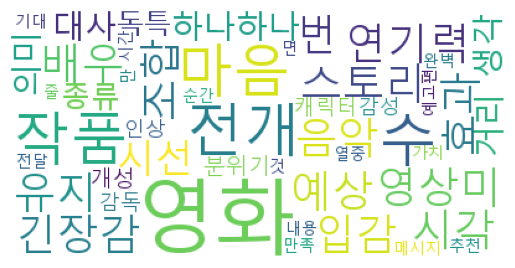

In [30]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()